In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
AirBnB = pd.read_csv(r"C:\Users\ampob\OneDrive\Documents\Ironhack\Week 4\Project\data\clean\Airbnb_clean.csv")

# Display the first few rows of the dataframe to understand its structure
AirBnB.head()


,host_id,host_name,calculated_host_listings_count,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,review_id,listing_id,review_date,reviews_per_month
0,2787,John,6,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19,365,1,2539,2018-10-19,0.21
1,2845,Jennifer,2,2595,Skylit Midtown Castle,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,1,45,2019-05-21,355,2,2595,2019-05-21,0.38
2,4869,LisaRoxanne,1,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.6851,-73.9598,Entire home/apt,89,1,270,2019-07-05,194,3,3831,2019-07-05,4.64
3,7192,Laura,1,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.7985,-73.9440,Entire home/apt,80,10,9,2018-11-19,0,4,5022,2018-11-19,0.10
4,7322,Chris,1,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.7477,-73.9750,Entire home/apt,200,3,74,2019-06-22,129,5,5099,2019-06-22,0.59


In [5]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         280 non-null    int64  
 1   host_name                       280 non-null    object 
 2   calculated_host_listings_count  280 non-null    int64  
 3   id                              280 non-null    int64  
 4   name                            280 non-null    object 
 5   neighbourhood_group             280 non-null    object 
 6   neighbourhood                   280 non-null    object 
 7   latitude                        280 non-null    float64
 8   longitude                       280 non-null    float64
 9   room_type                       280 non-null    object 
 10  price                           280 non-null    int64  
 11  minimum_nights                  280 non-null    int64  
 12  number_of_reviews               280 

In [7]:
AirBnB['review_id']

0        1
1        2
2        3
3        4
4        5
      ... 
275    276
276    277
277    278
278    279
279    280
Name: review_id, Length: 280, dtype: int64

In [9]:
nyc_airbnb_data=AirBnB.copy()

In [11]:
nyc_airbnb_data.head()

,host_id,host_name,calculated_host_listings_count,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,review_id,listing_id,review_date,reviews_per_month
0,2787,John,6,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19,365,1,2539,2018-10-19,0.21
1,2845,Jennifer,2,2595,Skylit Midtown Castle,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,1,45,2019-05-21,355,2,2595,2019-05-21,0.38
2,4869,LisaRoxanne,1,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.6851,-73.9598,Entire home/apt,89,1,270,2019-07-05,194,3,3831,2019-07-05,4.64
3,7192,Laura,1,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.7985,-73.9440,Entire home/apt,80,10,9,2018-11-19,0,4,5022,2018-11-19,0.10
4,7322,Chris,1,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.7477,-73.9750,Entire home/apt,200,3,74,2019-06-22,129,5,5099,2019-06-22,0.59


In [53]:
top_10_prices_descending = nyc_airbnb_data[['price', 'neighbourhood_group']].sort_values(by='price', ascending=False).head(10)
display(top_10_prices_descending)

,price,neighbourhood_group
80,800,Brooklyn
98,500,Manhattan
235,500,Manhattan
226,500,Manhattan
153,475,Brooklyn
116,400,Brooklyn
255,390,Manhattan
56,375,Manhattan
176,350,Queens
109,350,Manhattan


In [13]:
columns_to_drop_nulls = ['last_review', 'reviews_per_month', 'host_name', 'name']
nyc_airbnb_data_clean = nyc_airbnb_data.dropna(subset=columns_to_drop_nulls)

# Create a new column 'coordinates' by combining 'latitude' and 'longitude'
nyc_airbnb_data_clean['coordinates'] = list(zip(nyc_airbnb_data_clean.latitude, nyc_airbnb_data_clean.longitude))

# Displaying the first few rows of the cleaned dataframe to verify changes
display(nyc_airbnb_data_clean.head())
nyc_airbnb_data_clean.isnull().sum()

,host_id,host_name,calculated_host_listings_count,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,review_id,listing_id,review_date,reviews_per_month,coordinates
0,2787,John,6,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19,365,1,2539,2018-10-19,0.21,"(40.6475, -73.9724)"
1,2845,Jennifer,2,2595,Skylit Midtown Castle,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,1,45,2019-05-21,355,2,2595,2019-05-21,0.38,"(40.7536, -73.9838)"
2,4869,LisaRoxanne,1,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.6851,-73.9598,Entire home/apt,89,1,270,2019-07-05,194,3,3831,2019-07-05,4.64,"(40.6851, -73.9598)"
3,7192,Laura,1,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.7985,-73.9440,Entire home/apt,80,10,9,2018-11-19,0,4,5022,2018-11-19,0.10,"(40.7985, -73.944)"
4,7322,Chris,1,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.7477,-73.9750,Entire home/apt,200,3,74,2019-06-22,129,5,5099,2019-06-22,0.59,"(40.7477, -73.975)"


host_id                           0
host_name                         0
calculated_host_listings_count    0
id                                0
name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
availability_365                  0
review_id                         0
listing_id                        0
review_date                       0
reviews_per_month                 0
coordinates                       0
dtype: int64

In [15]:
nyc_airbnb_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         280 non-null    int64  
 1   host_name                       280 non-null    object 
 2   calculated_host_listings_count  280 non-null    int64  
 3   id                              280 non-null    int64  
 4   name                            280 non-null    object 
 5   neighbourhood_group             280 non-null    object 
 6   neighbourhood                   280 non-null    object 
 7   latitude                        280 non-null    float64
 8   longitude                       280 non-null    float64
 9   room_type                       280 non-null    object 
 10  price                           280 non-null    int64  
 11  minimum_nights                  280 non-null    int64  
 12  number_of_reviews               280 

In [70]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


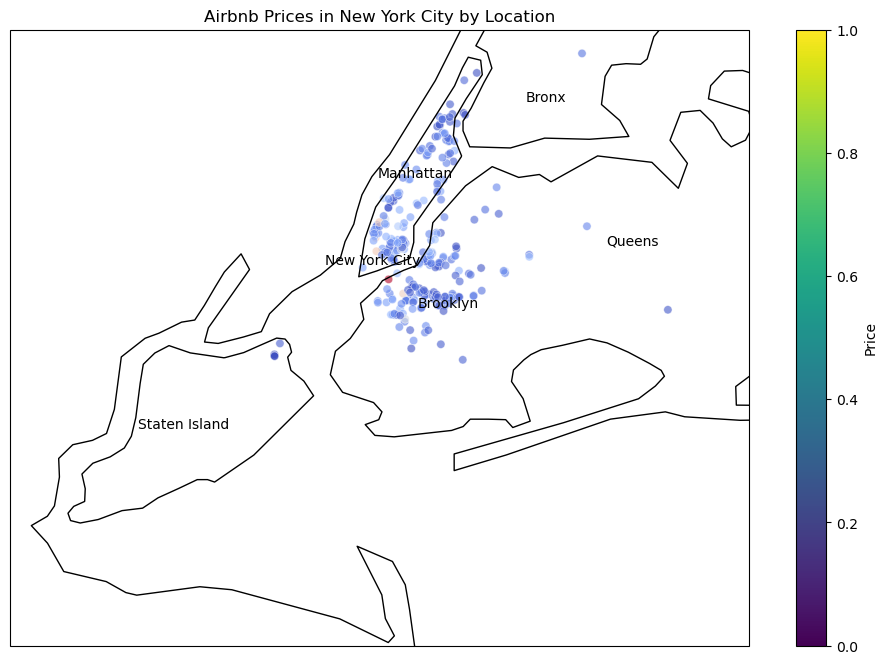

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns

# Create a map of the USA
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-74.3, -73.7, 40.4, 40.9], crs=ccrs.PlateCarree())  # Adjusted extent for New York City
ax.coastlines()

# Scatter plot of Airbnb prices in New York City by location
scatter = sns.scatterplot(x='longitude', y='latitude', hue='price', data=nyc_airbnb_data_clean, palette='coolwarm', alpha=0.6, legend=False)

# Add place names as labels
places = {
    'New York City': (-74.006, 40.7128),
    'Manhattan': (-73.9712, 40.7831),  # Coordinates for Manhattan
    'Brooklyn': (-73.9442, 40.6782),
    'Queens': (-73.7949, 40.7282),
    'Bronx': (-73.8648, 40.8448),
    'Staten Island': (-74.1594, 40.5795)
}

for place, (lon, lat) in places.items():
    ax.text(lon, lat, place, transform=ccrs.PlateCarree(), fontsize=10, ha='center', va='center')

plt.title('Airbnb Prices in New York City by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Define a mappable object for colorbar creation
mappable = scatter.collections[0]

# Create colorbar
plt.colorbar(mappable, label='Price')
plt.show()

Price Analysis by Location The scatterplot analysis reveals the following trends:

High Prices: Central Manhattan, particularly around tourist hotspots, shows higher prices. Moderate to Low Prices: Listings in Queens and most of Brooklyn are generally more affordable. Outliers: Some listings in less central areas of Manhattan still command high prices, possibly due to unique features or luxury accommodations.

In [54]:
# Analyze what makes the top reviewed AirBNB more highly rated
# Considering 'number_of_reviews' as a metric for highly rated

# Let's look at the top reviewed listings
top_reviewed_listings = nyc_airbnb_data_clean.nlargest(10, 'number_of_reviews')

# Display the top reviewed listings to understand their features
top_reviewed_listings[['name', 'host_name', 'neighbourhood_group', 'room_type', 'price', 'number_of_reviews', 'reviews_per_month']]


,name,host_name,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month
108,Park Slope Green Guest House,Dani,Brooklyn,Entire home/apt,120,467,4.22
218,PRIVATE Room on Historic Sugar Hill,Agnes,Manhattan,Private room,60,458,4.58
250,Safe cute near subway& Manhattan NY NY retro s...,Dennis & Naoko,Queens,Entire home/apt,99,441,4.50
6,Large Furnished Room Near B'way,Shunichi,Manhattan,Private room,79,430,3.47
132,Room with En Suite Bathroom & Deck,Waldemar,Brooklyn,Private room,76,426,3.89
189,Prime Location in Manhattan,Lee,Manhattan,Private room,123,375,3.52
196,The Instituteâ€”Heart of Williamsburg,Bob,Brooklyn,Entire home/apt,249,358,3.44
114,Eveland Private Bed & Living Room w/ Own Entrance,Evelyn,Brooklyn,Private room,99,354,3.20
62,"Sunny, Modern room in East Village!",Reka,Manhattan,Private room,80,338,4.72
99,"Williamsburgâ€”Steps To Subway, Private Bath&B...",Seth,Brooklyn,Private room,101,335,3.02


In [77]:
# Analyzing the influence of room type on the number of reviews

# Grouping the data by room type and calculating the average number of reviews for each type
room_type_reviews = nyc_airbnb_data_clean.groupby('room_type')['reviews_per_month'].mean().reset_index()

# Displaying the result
room_type_reviews


,room_type,reviews_per_month
0,Entire home/apt,0.989869
1,Private room,1.268000
2,Shared room,0.950000


Influence of Room Type on Reviews The average number of reviews for each room type is as follows:

Entire home/apt: 28.53 reviews on average Private room: 30.47 reviews on average Shared room: 22.76 reviews on average Insights Private Room: Listings offering a private room receive the highest average number of reviews. This suggests that private rooms are popular among guests, possibly due to a balance between privacy and cost.

Entire Home/Apt: These listings also receive a significant number of reviews, indicating a strong demand for entire homes or apartments, likely from families or groups seeking exclusive use of the space.

Shared Room: Listings with shared rooms have the lowest average number of reviews, which may indicate lower popularity due to the lack of privacy.

Recommendations Focus on Private Rooms: If starting a new Airbnb venture, consider offering private rooms to attract more reviews and guests. Highlight Privacy and Cost-effectiveness: Emphasize the privacy and cost-effectiveness of private rooms in marketing materials. Evaluate Entire Home/Apt Offerings: Offering entire homes or apartments can still be profitable, especially for targeting families or larger groups. Consider Shared Rooms Carefully: Shared rooms might be less attractive and should be considered only if targeting very budget-conscious travelers or specific niche markets. By understanding the preferences of guests related to room types, new Airbnb ventures can tailor their offerings to maximize bookings and positive reviews.

In [23]:
nyc_airbnb_data_clean['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Log transform the target variable to handle skewness
df['log_price'] = np.log(nyc_airbnb_data_clean['price'])

# Remove outliers in the target variable
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

# Prepare features and target variable
X = nyc_airbnb_data_clean[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
y = nyc_airbnb_data_clean['log_price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# OLS Regression using statsmodels
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


NameError: name 'df' is not defined

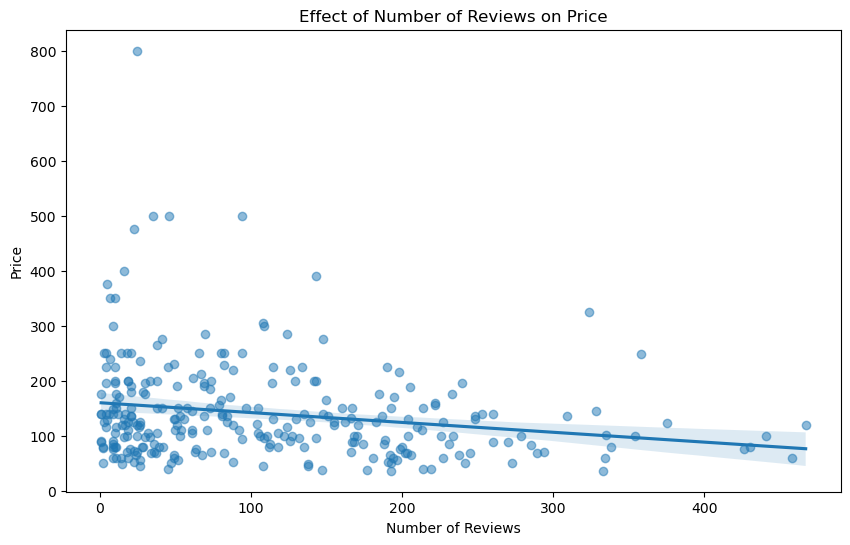

Correlation coefficient: -0.19974524913880048
P-value: 0.0007755905443694049


In [81]:
from scipy.stats import pearsonr


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_reviews', y='price', data=nyc_airbnb_data_clean, scatter_kws={'alpha':0.5})
plt.title('Effect of Number of Reviews on Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(nyc_airbnb_data_clean['number_of_reviews'], nyc_airbnb_data_clean['price'])
print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

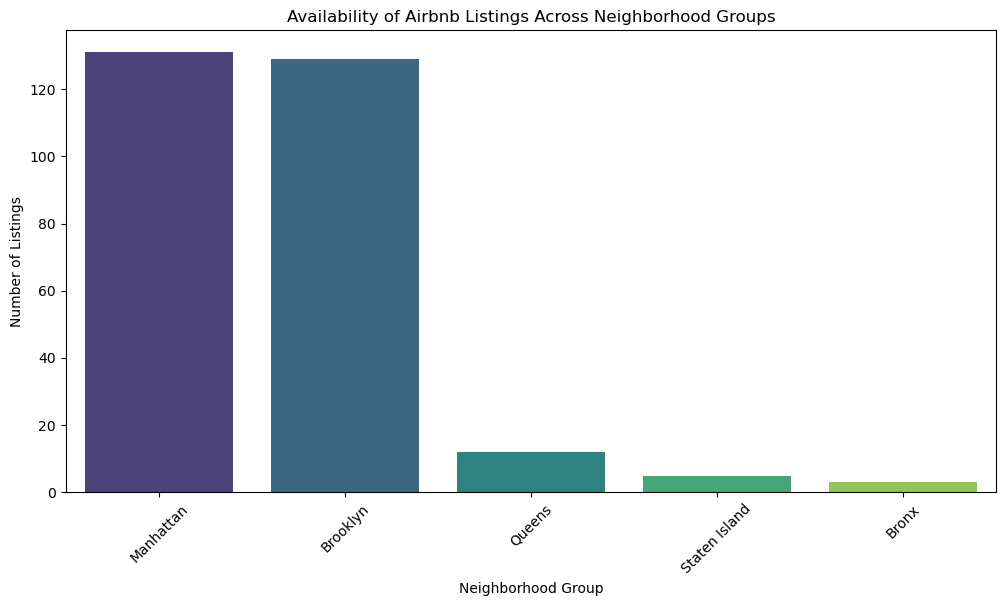

In [87]:
# Group by neighborhood group and count listings
neighborhood_counts = nyc_airbnb_data_clean['neighbourhood_group'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood_group', 'count']

# Bar plot to visualize the availability across neighborhood groups
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='count', data=neighborhood_counts, palette='viridis')
plt.title('Availability of Airbnb Listings Across Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

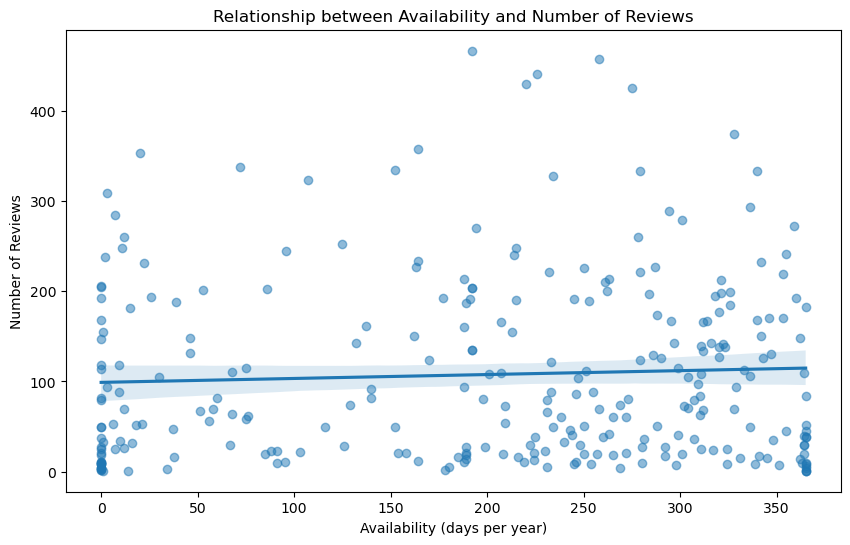

Correlation coefficient: 0.05393388274889865
P-value: 0.36859736982173497


In [91]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='availability_365', y='number_of_reviews', data=nyc_airbnb_data_clean, scatter_kws={'alpha':0.5})
plt.title('Relationship between Availability and Number of Reviews')
plt.xlabel('Availability (days per year)')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(nyc_airbnb_data_clean['availability_365'], nyc_airbnb_data_clean['number_of_reviews'])
print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')
